# Introduction to knime(py) 

The `knime(py)` provides tools for reading and executing KNIME workflows from Python. It also provides functionality to export output of KNIME workflows to pandas dataframes when pandas is installed.

The aim of this introduction is to demonstrate the possibility of using this package to help us with the grading of student's lab work as a formative or summative assessment. Here we are using the Lab 5 task 1 of the SAE curriculum to demonstrate a proof of concept of *computer-assisted grading* of KNIME lab assignments using python. 

[Preamble](#preamble)

[Workspace](#workspace)

[Displaying a workflow and introducing COT nodes](#display_cot)

[Reading and executing KNIME workflows in python](#read_execu)


[Processing a submitted workflow](#process-submitted-workflow)

- [Completed correct workflow](#complete_correct)
- [Customised function to identify output tables](#customised_functions)

[](#)

Archives below:

[Saving output data](#save_data)



### Preamble
<a id='preamble'></a>

We begin with the imports of the packages needed for this demonstration. While we import the `knime` package in a similar fashion to the other commonly used packages, installation of the `knime` package through the typical installation process (`pip`, `pip3` or `conda`) is not required, and is not possible on the SP laptop due to insufficient administrative rights. 

By directly downloading the [`knime.py` script](https://github.com/knime/knimepy/blob/master/knime.py) from the [`knime` package repository](https://github.com/knime/knimepy) into your project directory, we can easily make use of the toolkit. 

In [1]:
import knime
import pandas as pd
import numpy as np
import os
from IPython.display import SVG
import xml.etree.ElementTree as ET

import warnings
warnings.filterwarnings('ignore')

# imports below fail although installed. suspect is due to no admin rights
# import cairosvg
# from svglib.svglib import svg2rlg
# from reportlab.graphics import renderPM`

### Workspace
<a id='workspace'></a>
The first step is to identify the workspace which we would want to work in，and the workspace should contain workflows which you are planning to grade. The command below saves the location of my KNIME workspace `knimepy` as `workspace`.

**Note:** As a typical directory name consists of `\` we need a `r` in front of the string. Such strings are called raw strings and treat backslashes as literal characters. Further information can be read from [Python's string literals section](https://docs.python.org/3.7/reference/lexical_analysis.html#string-and-bytes-literals).

In [2]:
workspace = r"C:\Users\s11006381\knime-workspace\knimepy"

Below we list out all the files in the workspace `knimepy`. Other than the workflows, it also contains the default `Example Workflows` and `.metadata`. The remaining files listed are the workflows which we will use in the demonstration.

The enumeration is for easy access to the workflow of interest using an index instead of having to type the entire filename.

In [3]:
workspace_files = os.listdir(workspace)
for i,j in enumerate(workspace_files):
    print(i,j)

0 .metadata
1 C5_Lab5_Task1_Data_prep_clean
2 Example Workflows
3 s11006381_bad_annotation
4 s11006381_complete
5 s11006381_err
6 s11006381_partial


Next, we append the path of the directory to the workflows. The full path of the workflow is how we indicate the workflow to python. Observe that the `C5_Lab5_Task1_Data_prep_clean` workflow is the second item in the list with index `1`.

In [4]:
workflow_dir_list = [os.path.join(workspace,workspace_files[i]) for i in range(len(workspace_files))]
for i,j in enumerate(workflow_dir_list):
    print(i,j)

0 C:\Users\s11006381\knime-workspace\knimepy\.metadata
1 C:\Users\s11006381\knime-workspace\knimepy\C5_Lab5_Task1_Data_prep_clean
2 C:\Users\s11006381\knime-workspace\knimepy\Example Workflows
3 C:\Users\s11006381\knime-workspace\knimepy\s11006381_bad_annotation
4 C:\Users\s11006381\knime-workspace\knimepy\s11006381_complete
5 C:\Users\s11006381\knime-workspace\knimepy\s11006381_err
6 C:\Users\s11006381\knime-workspace\knimepy\s11006381_partial


### Displaying a workflow and introducing COT nodes
<a id='display_cot'></a>
We will start with `C5_Lab5_Task1_Data_prep_clean` which is the completed workflow provided by the module coordinator. Here we imagine a scenario where the numerical result of the last node of the workflow is the data which we use to grade the submission.

To extract the numerical output of any node in a workflow, we need to connect it to the `Container Output (Table)` node which will be abbreviated as **COT node** after, as see on the extreme right of the workflow displayed below.

Thus a computer-assisted grading of a KNIME submission, would require the *submissions to have COT nodes added* to the nodes whose outputs are graded.

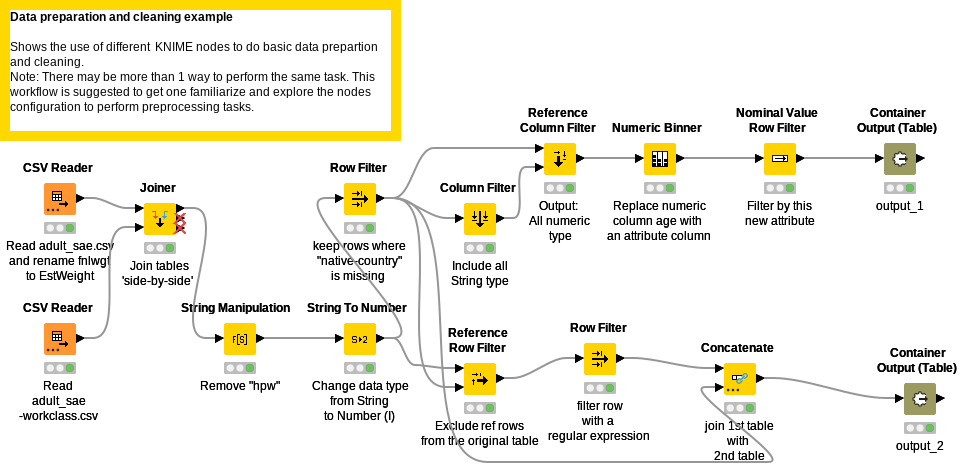

Wall time: 146 ms


In [5]:
%%time
with knime.Workflow(workflow_dir_list[1]) as wf:
    wf.display_svg()

### Reading and executing KNIME workflows in python
<a id='read_exec'></a>
The `knime.Workflow` function takes in the full workflow path directory and generates an workflow object `wf`. Other than being able to display the graphical workflow, the following commands are of interest to us:

1. `wf.execute()` executes the workflow
2. `wf.display_svg()` displays the svg image of the workflow
3. `wf.data_table_outputs` returns a list of panda dataframes which are collected from the `Container Output (Table)` node, after executing the workflow in python.
4. `SVG(wf._adjust_svg())` saves the svg file in `IPython.core.display.SVG` format. Needs additional package for it to be saved to file.

**Note:** It is important that the KNIME workflow is not open in KNIME, otherwise it will return an error message which says: `Workflow is locked by another KNIME instance`.

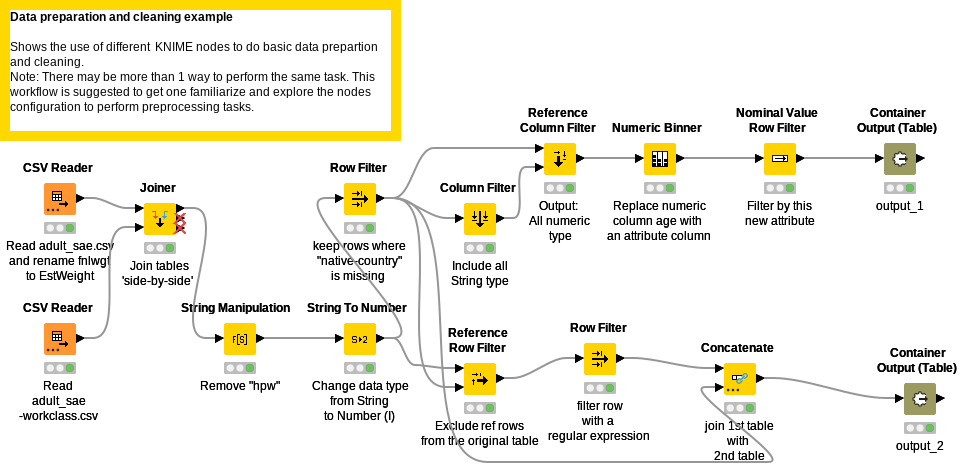

Wall time: 16.4 s


In [6]:
%%time
with knime.Workflow(workflow_dir_list[1]) as wf:
    wf.display_svg()                       # displays svg graphical workflow
    wf.execute()                           # executes the workflow
    output_tables = wf.data_table_outputs  # saves all the data collected in the COT nodes as a list of pandas dataframe 
    img = SVG(wf._adjust_svg())            # saves svg graphical workflow in img (for saving image to local drive)


In the workflow above, we see that there are two COT nodes connected to the last node of the lab task. When the COT node is executed, the data from the previous node is piped into it. In python, it is retrieved using the `wf.data_table_outputs`, and we have saved it as `output_tables`. As there are two COT nodes, this means `output_tables` is a list of two pandas dataframe.

**Note:** An issue with `wf.data_table_outputs` is while we have all the tables in a list, there is no good way of identifying which table in the list matches to the output of a particular COT node. This problem can possibly circumvented by using other information like number of rows, number of columns to identify the outputs for grading submissions.

In [7]:
len(output_tables)

2

In [8]:
output_tables[0].head()

,age,EstWeight,education-num,capital-gain,capital-loss,hours-per-week(new)
0,middle,121772,11,0,0,40
1,middle,84154,10,0,0,38
2,middle,293936,4,0,0,40
3,middle,117747,9,0,1573,35
4,middle,153141,9,0,0,40


In [9]:
output_tables[1].head()

,age,EstWeight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass,hours-per-week(new)
0,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40hpw,United-States,<=50K,Private,40
1,49,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16hpw,Jamaica,<=50K,Private,16
2,34,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45hpw,Mexico,<=50K,Private,45
3,38,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50hpw,United-States,<=50K,Private,50
4,35,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40hpw,United-States,<=50K,Federal-gov,40


## Processing a submitted workflow
<a id='process-submitted-workflow'></a>

The processing of a submitted workflow is slightly more challenging as it requires us to work with the submitted data...

### Completed correct workflow
<a id='complete_correct'></a>
Here we look at how the computer-assisted grading process works for a completed and correct submission. The workflow filename is named based on the submitters unique id.

In [10]:
workflow_dir_list[4]

'C:\\Users\\s11006381\\knime-workspace\\knimepy\\s11006381_complete'

Other than the additional COT nodes, we would also require a specific annotation for the COT nodes to indicate those as the tables for submission. Here we use `output_*` as the prefix, followed by the number.

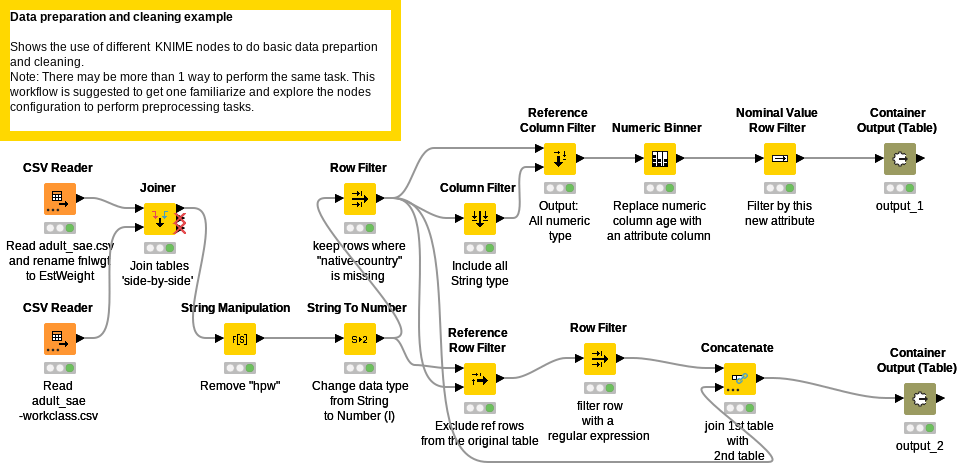

Wall time: 18.7 s


In [11]:
%%time
with knime.Workflow(workflow_dir_list[4]) as sub_wf:
    sub_wf.display_svg()
    sub_wf.execute()
    sub_tables = sub_wf.data_table_outputs
    sub_img = SVG(sub_wf._adjust_svg())


### Customised function to identify output tables
<a id='customised_functions'></a>
The issue of identifying which pandas dataframe from `sub_tables` matches to `secG` is addressed with the custom written function `data_table_outputs_annotation`. Thus we are able to match the two dataframes in the list `sub_tables` to the corresponding annotations retrieved by the `data_table_outputs_annotation` function defined in the `knime.Workflow` class.

Thus for us to use computer-assisted grading of KNIME lab assignments we require:
1. Connection of outputs to be graded to COT nodes
2. Annotations of COT nodes for identification

The conditions above are easily achieved by providing clear instructions on the submission format. With access to annotations of the COT nodes, we can easily identify the output data to the respective nodes.

In [12]:
len(sub_tables)

2

In [13]:
sub_wf.data_table_outputs_annotation

['output_1', 'output_2']

Storing our output tables as a dictionary is more convenient, thus we use the function below to return a dictionary where the key is the annotation and the value is the output dataframe.

In [14]:
def collect_workflow_outputs(path_to_knime_workflow):
    """
    Collect all the outputs of the workflow in the provided path to a KNIME workflow.
    Returns a dictionary where (key,value) = (node annotation,output table)
    """
    wf = knime.Workflow(path_to_knime_workflow)
    wf.execute()
    return dict(zip(wf.data_table_outputs_annotation,wf.data_table_outputs))

We can easily collect the model answer to the lab assigment by providing the completed workflow. This model answer will then be used to verify if the submissions have the same answer.

In [15]:
print(workflow_dir_list[1])
model_ans = collect_workflow_outputs(workflow_dir_list[1])

C:\Users\s11006381\knime-workspace\knimepy\C5_Lab5_Task1_Data_prep_clean


A simple illustration of collecting the output data and annotation for multiple workflows which roughly takes **43 seconds**. Note that `l` is a list of dictionaries; each dictionary contains all the COT node annotations and COT node data.

In [37]:
%%time
l = []
for i in workflow_dir_list[3:7]:
    print(i)
#     d = collect_workflow_outputs(i)
    l.append(collect_workflow_outputs(i))

print(len(l))    

C:\Users\s11006381\knime-workspace\knimepy\s11006381_bad_annotation
C:\Users\s11006381\knime-workspace\knimepy\s11006381_complete
C:\Users\s11006381\knime-workspace\knimepy\s11006381_err


C:\Users\s11006381\knime-workspace\knimepy\s11006381_partial
4
Wall time: 1min 2s


It is known that the workflow `s11006381_complete` does exactly what is done in the lab and should have the same answer as the completed workflow provided by the MC.

In [38]:
workflow_dir_list

['C:\\Users\\s11006381\\knime-workspace\\knimepy\\.metadata',
 'C:\\Users\\s11006381\\knime-workspace\\knimepy\\C5_Lab5_Task1_Data_prep_clean',
 'C:\\Users\\s11006381\\knime-workspace\\knimepy\\Example Workflows',
 'C:\\Users\\s11006381\\knime-workspace\\knimepy\\s11006381_bad_annotation',
 'C:\\Users\\s11006381\\knime-workspace\\knimepy\\s11006381_complete',
 'C:\\Users\\s11006381\\knime-workspace\\knimepy\\s11006381_err',
 'C:\\Users\\s11006381\\knime-workspace\\knimepy\\s11006381_partial']

In [39]:
def compare_COT_annotation(d1,d2):
    """
    
    """
    diff_ann = []
    for k in d2:
        if not (k in list(d1.keys())):
            diff_ann.append(k)
    return diff_ann    

In [40]:
# comparing COT annotations of multiple submissions
for i in l:
    diff = compare_COT_annotation(model_ans,i)
    print(diff)

['output1']
[]
[]
[]


In [60]:
def compare_dict_outputs(d1,d2):
    n = len(list(d1.keys()))
    c = 0
    for k in d2:
        if d2[k].equals(d1[k]):
            c += 1
    return c/n 

In [61]:
# comparing dic of multiple submissions
for i in l:
    try:
        s = compare_dict_outputs(model_ans,i)
        print(s)
    except:
        print('Err')
    

Err
1.0
0.0
0.0


# Continue from here

The graphical display of the submitted workflow tells us that the workflow is not completed; only one of the path is done. The graphical display also shows the state of the workflow which the submission is saved; if some nodes are not configured, have errors or warnings, it is shown.

### Rename variable task

Below is an example of a submission where the renaming of the variable is not done.

In [ ]:
sub_tables[0].columns

In [ ]:
secG.columns

We can compare the columns names

In [ ]:
x=np.where((stu_tables[0].columns == secG.columns) == True)[0]

In [ ]:
x

In [ ]:
stu_tables[0][x]

In [ ]:
def check_var_names(df, stu_df):
    idx = np.where((stu_df.columns == df.columns) == False)[0]
    score = np.average(stu_df.columns == df.columns)
    print("The following variables have not been renamed:\n{}".format(stu_df.columns[idx]))
    return stu_df.columns[idx], score

In [ ]:
v,s = check_var_names(secG,stu_tables[0])

In [ ]:
secG.dtypes['hours-per-week(new)']

In [ ]:
def dtype_check(df, stu_df,cols):
    n =
    for v in cols:
        df.dtypes[v] == stu_df.dtypes[v]
    

In [ ]:
secG.dtypes

In [ ]:
stu_tables[0].dtypes

Running a student's workflow

In [ ]:
with knime.Workflow(workflow_list[5]) as stu_wf:
    stu_wf.execute()
    stu_wf.display_svg()
    stu_tables = stu_wf.data_table_outputs
    stu_img = SVG(stu_wf._adjust_svg())


In [ ]:
stu_tables = stu_wf.data_table_outputs

In [ ]:
secG.equals(stu_tables[0])

In [ ]:
secG.dtypes

In [ ]:
stu_tables[0].dtypes

In [ ]:
secG.columns == stu_tables[0].columns

In [ ]:
secG.compare(stu_tables[0])

In [ ]:
stu_tables[0].dtypes == secG.dtypes

In [ ]:
np.where((np.array(secG.dtypes) == np.array(stu_tables[0].dtypes))==False)

In [ ]:
list(secG.dtypes) == list(stu_tables[0].dtypes)

In [ ]:
stu_tables[0]

In [ ]:
type(img)

### Saving output data
<a id='save_data'></a>
Here, data of the COT node labeled `section G output` is found as the first dataframe in `output_tables`.

Saving of the pandas dataframe to our local directory is done using the `to_pickle` function. The saved dataframe will be stored with a `.pkl` extension.

As an illustration, we save `output_tables[0]` to `secG.pkl`, and it can be found in the project directory immediately.

In [ ]:
output_tables[0].to_pickle('secG.pkl')
del output_tables
os.listdir()

We can read the pickled dataframes back into our environment with `pd.read_pickle`. With these dataframes, we can use python to help us check if the workflow submitted by our students are correct when compared to our model answer.

In [ ]:
output_1 = pd.read_pickle("secG.pkl")
output_1.head()